<a href="https://colab.research.google.com/github/Vitor-Santos-Cacula/Projetos-de-Dados/blob/main/An%C3%A1lise_De_Dados_%2BBIKE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Análise dos Dados Projeto +BIKE**

A base de dados que iremos explorar se refere aos registros dos passeios realizados através do projeto +BIKE, um projeto que tem por objetivo distribuir bicicletas em pontos estratégicos de cidades, oferecendo uma solução de transporte de pequeno percurso que contribui com a mobilidade das pessoas em centros urbanos.
É possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

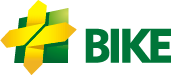

## Obtenção dos Dados


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns  
import plotly.graph_objs as go

In [3]:
df = pd.read_csv("http://dl.dropboxusercontent.com/s/yyfeoxqw61o3iel/df_rides.csv")
df.head()

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0


###**Dicionário das variáveis**

* ... **Genero** - Genero informado pelo usuário 
* ... **Data_de_nascimento** - Data de nascimento do usuário
* ... **Estado** - Estado onde ocorreu o passeio
* ... **Data_Passeio** - Data do passeio
* ... **Hora_inicio** - Hora de inicio do passeio
* ... **Hora_Fim** - Hora de finalização do passeio
* ... **Estacao_inicio** - Local de inicio
* ... **Estacao_fim** - Local final
* ... **Duracao_Passeio** - Tempo total do passeio
* ... **Passeio_atrasado** - Define os passeios mais demorados


###Renomeando Colunas do dataset

In [4]:
df.columns = ['Genero','Data_de_nascimento','Cidade_Estado','Data_Passeio','Hora_Inicio', 'Hora_Fim','Estacao_Inicio','Estacao_Fim','Duracao_Passeio','Passeio_atrasado']
df.head(1)

,Genero,Data_de_nascimento,Cidade_Estado,Data_Passeio,Hora_Inicio,Hora_Fim,Estacao_Inicio,Estacao_Fim,Duracao_Passeio,Passeio_atrasado
0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.25,0.0


###**Tamanho do Dataset**


Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [5]:
print("Quantidade de registros: {}".format(df.shape[0]))
print("Quantidade de colunas: {}\n".format(df.shape[1]))

display(df.dtypes)

Quantidade de registros: 287322
Quantidade de colunas: 10



Genero                 object
Data_de_nascimento     object
Cidade_Estado          object
Data_Passeio           object
Hora_Inicio            object
Hora_Fim               object
Estacao_Inicio         object
Estacao_Fim            object
Duracao_Passeio       float64
Passeio_atrasado      float64
dtype: object

#**Tratamento De Dados**

Como o Dataset é muito extenso, teríamos que realizar uma série de tratamentos, que demandaria muito tempo de processamento. Então iremos resumir o nosso Dataset para pelo menos **10.000** linhas, utilizando o método `Sample()`.

In [6]:
df1 = df.sample(10000,random_state=20000)
df1

,Genero,Data_de_nascimento,Cidade_Estado,Data_Passeio,Hora_Inicio,Hora_Fim,Estacao_Inicio,Estacao_Fim,Duracao_Passeio,Passeio_atrasado
58387,F,1966-04-22,NaN,2018-03-17,16:18:23,15:46:48,42 - PAT,42 - PAT,NaN,NaN
265289,F,1985-12-02,DF,2018-08-17,18:40:37,19:03:19,6 - Rodoviária,22 - 102 Sul,22.700000,0.0
207397,M,2016-02-18,DF,2018-07-09,11:16:17,11:24:59,41 - Instituto de Artes,46 - EQN 408/409,8.700000,0.0
135948,M,1991-06-21,NaN,2018-05-21,18:49:00,18:55:01,16 - SRTVS,24 - Galeria,6.016667,0.0
225833,F,1991-05-04,NaN,2018-07-22,11:32:06,13:22:36,32 - SQS 305,32 - SQS 305,110.500000,1.0
...,...,...,...,...,...,...,...,...,...,...
195119,M,1996-02-07,NaN,2018-06-29,16:40:26,NaN,3 - Centro de Convenções,15 - Brasil 21,NaN,NaN
219872,M,1987-06-11,NaN,2018-07-18,08:08:37,08:14:16,39 - CLN 406,43 - Biblioteca Central,5.650000,0.0
55638,M,1974-09-09,NaN,2018-03-14,17:02:35,16:48:48,30 - TSE,6 - Rodoviária,NaN,NaN
180940,M,1991-07-10,DF,2018-06-19,13:02:54,NaN,40 - W2/EQN305/306,41 - Instituto de Artes,NaN,NaN


###Convertendo colunas de data

Iremos converter as colunas `Data_de_nascimento` e `Data_Passeio` para o tipo datetime, para facilitar as nossas análises em linha de tempo.

In [7]:
df1['Data_Passeio'] = pd.to_datetime(df1['Data_Passeio'])
df1['Data_de_nascimento'] = pd.to_datetime(df1['Data_de_nascimento'])

In [8]:
df1.drop(df1.loc[(df1['Data_de_nascimento'] >= df['Data_Passeio'].max()) ].index,axis=0,inplace=True)

###Identificando os valores ausentes

É indispensável identificar a quantidade de valores ausentes e qual a representatividade dessa quantidade frente ao total de entradas.

* É possível ver que a coluna `Genero` possui **0,14%** dos seus valores faltantes.

* A coluna `Cidade_Estado` possui aproximadamente **62%** dos seus valores faltantes.

* A coluna `Hora_fim` possui **15%** dos seus valores faltantes.

* As colunas `Duracao_Passeio` e `Passeio_atrasado` possuem **25%** dos seus valores faltantes.

In [9]:
df1.isnull().sum() / df1.shape[0]

Genero                0.001402
Data_de_nascimento    0.000000
Cidade_Estado         0.624800
Data_Passeio          0.000000
Hora_Inicio           0.000000
Hora_Fim              0.152244
Estacao_Inicio        0.000000
Estacao_Fim           0.000000
Duracao_Passeio       0.253606
Passeio_atrasado      0.253606
dtype: float64

##**Tratando valores ausentes**

###**Preenchendo valores ausentes**

Preencher, normalmente é a melhor opção, pois permite que você mantenha dados existentes em outras células.

* No caso da coluna **`Genero`**, temos uma variável categórica. O ideal aqui é usar o valor mais frequente para o preenchimento dos valores. Ver qual aquele que tem maior recorrência e substituir diretamente na coluna.

Abaixo e possível ver que o valor mais frequente caso é **"M"**, e iremos preencher as demais células usando o método `Fillna()`.

In [10]:
display(df1.Genero.value_counts())

df1.fillna({"Genero": "M"},inplace=True)

M    7434
F    2536
Name: Genero, dtype: int64

* No caso da coluna **`Cidade_Estado`**, temos situações em que a coluna possui valor ausente, porém é possivel identificar sua localizalção através da coluna **`Estacao_Inicio`**, onde informa a localidade inicial do passeio.

Para isso iremos criar uma lista que possuirá todos os nome de cada Cidade/Estado registradas no Dataset, e suas devidas estações, isso servirá como um De/Para ao realizarmos o preenchimento da coluna **`Cidade_Estado`** com base na sua **`Estacao_Inicio`**.
Para cada registro onde o campo **`Cidade_Estado`** é Nulo, iremos verificar a sua **`Estacao_Inicio`** e preencher sua Cidade_Estado conforme a lista de De/Para.
Isso irá reduzir bastante os valores nulos do Dataset e evitará a perda de informações.

In [11]:
Cidade_Estado = df1["Cidade_Estado"].unique()
Locais = []
for Estado in Cidade_Estado:
  dados = df1.loc[df["Cidade_Estado"] == Estado, ["Cidade_Estado","Estacao_Inicio"]]
  dados = dados[['Estacao_Inicio','Cidade_Estado']].value_counts().index.values
  Locais.append(dados)

In [12]:
for Local in range(len(Locais)):
  for Estacao in range(len(Locais[Local])):
    df1.loc[(df["Cidade_Estado"].isnull() == True) & (df["Estacao_Inicio"]==Locais[Local][Estacao][0]), "Cidade_Estado"] = Locais[Local][Estacao][1]
df1.drop(df1.loc[df1['Cidade_Estado']=='lilicavida@hotmail.com'].index,axis=0,inplace=True)

In [13]:
df1.head()

,Genero,Data_de_nascimento,Cidade_Estado,Data_Passeio,Hora_Inicio,Hora_Fim,Estacao_Inicio,Estacao_Fim,Duracao_Passeio,Passeio_atrasado
58387,F,1966-04-22,Valparaíso de Goiás,2018-03-17,16:18:23,15:46:48,42 - PAT,42 - PAT,NaN,NaN
265289,F,1985-12-02,DF,2018-08-17,18:40:37,19:03:19,6 - Rodoviária,22 - 102 Sul,22.700000,0.0
207397,M,2016-02-18,DF,2018-07-09,11:16:17,11:24:59,41 - Instituto de Artes,46 - EQN 408/409,8.700000,0.0
135948,M,1991-06-21,Novo Hamburgo,2018-05-21,18:49:00,18:55:01,16 - SRTVS,24 - Galeria,6.016667,0.0
225833,F,1991-05-04,PR,2018-07-22,11:32:06,13:22:36,32 - SQS 305,32 - SQS 305,110.500000,1.0


In [14]:
print("% de Valores Nulos:\n")
df1.isnull().sum() / df1.shape[0]

% de Valores Nulos:



Genero                0.000000
Data_de_nascimento    0.000000
Cidade_Estado         0.000000
Data_Passeio          0.000000
Hora_Inicio           0.000000
Hora_Fim              0.153584
Estacao_Inicio        0.000000
Estacao_Fim           0.000000
Duracao_Passeio       0.253491
Passeio_atrasado      0.253491
dtype: float64

* Já para a coluna `Duracao_Passeio`, iremos utilizar um método direto e simples para preencher os dados faltantes, que consiste em substituir os valores nulos de uma coluna do tipo numérico com **Mediana** da própria coluna.

In [15]:
Duracao_md = df1["Duracao_Passeio"].median()
df1.fillna({"Duracao_Passeio":Duracao_md},inplace =True)
df1.isnull().sum() / df1.shape[0]

Genero                0.000000
Data_de_nascimento    0.000000
Cidade_Estado         0.000000
Data_Passeio          0.000000
Hora_Inicio           0.000000
Hora_Fim              0.153584
Estacao_Inicio        0.000000
Estacao_Fim           0.000000
Duracao_Passeio       0.000000
Passeio_atrasado      0.253491
dtype: float64

* Conforme análise abaixo, verificamos que a coluna `Passeio_atrasado` considera como **1** para rotas mais demoradas, e que tenha uma Duração de no mínimo **61 minutos**, e **0** para uma rota mais curta e que tenha menos de **61 minutos**.




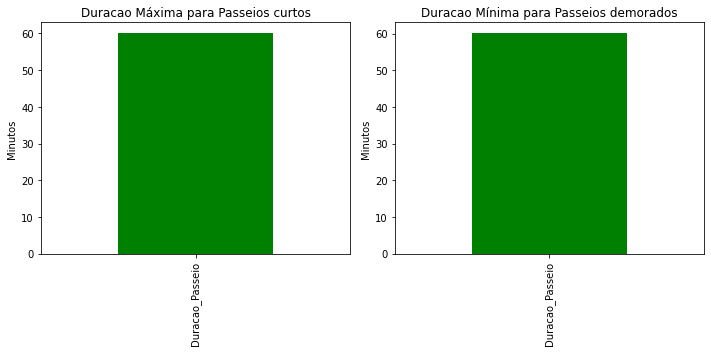

In [16]:
fig,(ax,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax.set_title("Duracao Máxima para Passeios curtos")
ax1.set_title("Duracao Mínima para Passeios demorados")
ax.set_ylabel("Minutos")
ax1.set_ylabel("Minutos")
#ax1.set_label("Passeios Demorados")
df1.loc[df["Passeio_atrasado"]==0,['Duracao_Passeio']].max().plot(kind='bar', ax=ax, color = 'green')
df1.loc[df["Passeio_atrasado"]==1,['Duracao_Passeio']].min().plot(kind='bar', ax=ax1,color = 'green')

plt.tight_layout()

Apartir dessa análise, podemos preencher os valores nulos da coluna `Passeio_atrasado` da seguinte forma:

**0**: Para linhas em que o valor de `Duracao_Passeio` for **menor** ou **igual** à **60**.

**1**: Para linhas em que o valor de `Duracao_Passeio` for **maior** que **60**.


In [17]:
df1.loc[(df1["Passeio_atrasado"].isnull() == True) & (df1['Duracao_Passeio'] <= 60), 'Passeio_atrasado'] = 0
df1.loc[(df1["Passeio_atrasado"].isnull() == True) & (df1['Duracao_Passeio'] >  60), 'Passeio_atrasado'] = 1

In [18]:
print("% de Valores Nulos:\n")
df1.isnull().sum() / df1.shape[0]

% de Valores Nulos:



Genero                0.000000
Data_de_nascimento    0.000000
Cidade_Estado         0.000000
Data_Passeio          0.000000
Hora_Inicio           0.000000
Hora_Fim              0.153584
Estacao_Inicio        0.000000
Estacao_Fim           0.000000
Duracao_Passeio       0.000000
Passeio_atrasado      0.000000
dtype: float64

###**Distribuição das variáveis**

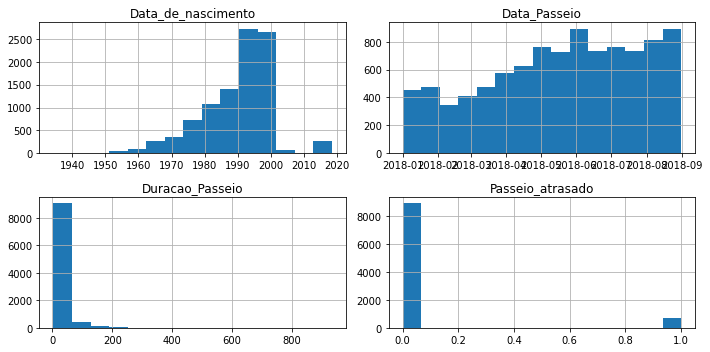

In [19]:
# ver a porcentagem de valores ausentes
df1.hist(bins =15,figsize=(10,5))
plt.tight_layout()

##**Há Outliers presentes?**

Através do Histograma é possível notar indícios de presenças de outliers. Por exemplo a variável `Duracao_Passeio`.


Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [20]:
df1[['Duracao_Passeio','Passeio_atrasado']].describe()

,Duracao_Passeio,Passeio_atrasado
count,9669.000000,9669.000000
mean,25.876264,0.074465
std,47.760088,0.262539
min,3.000000,0.000000
25%,9.816667,0.000000
50%,14.233333,0.000000
75%,24.233333,0.000000
max,934.833333,1.000000


Olhando o resumo estatístico acima, podemos confirmar a seguinte hipótese:

* A variável `Duracao_Passeio` possui 75% dos valores abaixo de **24 minutos**, porém seu valor máximo é de **934 minutos**.

#### Boxplot para Duracao_Passeio

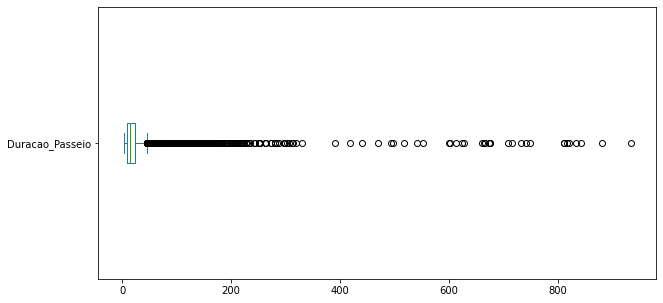

In [21]:
df1['Duracao_Passeio'].plot(kind='box', vert= False, figsize=(10,5))

##**Indentificando Outliers com Amplitude Interquartil**
A amplitude interquartil é uma medida de dispersão dos dados. No nosso caso, utilizaremos o cálculo para analisar a dispersão dos valores da coluna `Duracao_Passeio`, e definir um limite de valor mínimo e máximo, que quando ultrapassados, devemos considerar **Outliers**.

* Percentil 25 = Primeiro quartil (Q1)
* Percentil 75 = Terceiro quartil (Q3)

`Amplitude Interquartil` = Diferença entre Q1(primeiro quartil) e Q3(terceiro quartil)

`Limite Inferior` = Q1 - (1.5 * Amplitude Interquartil) 

`Limite Superior` = Q3 + (1.5 * Amplitude Interquartil)


Calculando quartis **Q1** e **Q3**.

In [22]:
Q1 = np.percentile(df1['Duracao_Passeio'],25)
Q3 = np.percentile(df1['Duracao_Passeio'],75)

print("Q1 = {}".format(Q1))
print("Q3 = {}".format(Q3))

Q1 = 9.816666666666666
Q3 = 24.23333333333333


Definindo **limite inferior** e **limite Superior**.

In [23]:
C = 1.5
IIQ= Q3-Q1
LI = Q1 - (C*IIQ)
LS = Q3 + (C*IIQ)

print("IIQ: {}".format(IIQ))
print("Limites: ")
print("Inferior: {}".format(LI))
print("Superior: {}".format(LS))

IIQ: 14.416666666666664
Limites: 
Inferior: -11.80833333333333
Superior: 45.85833333333333


* Dessa forma, considerando esse critério, podemos afirmar que valores de **Duracao_Passeio** superiores a **45** e inferiores a **-11** são outliers nessa amostra.

##Remoção de Outliers

Já que identificamos *outliers* nas variável `Duracao_Passeio`, vamos agora limpar do *DataFrame* os valores que ultrapassam os limites e plotar novamente o histograma.

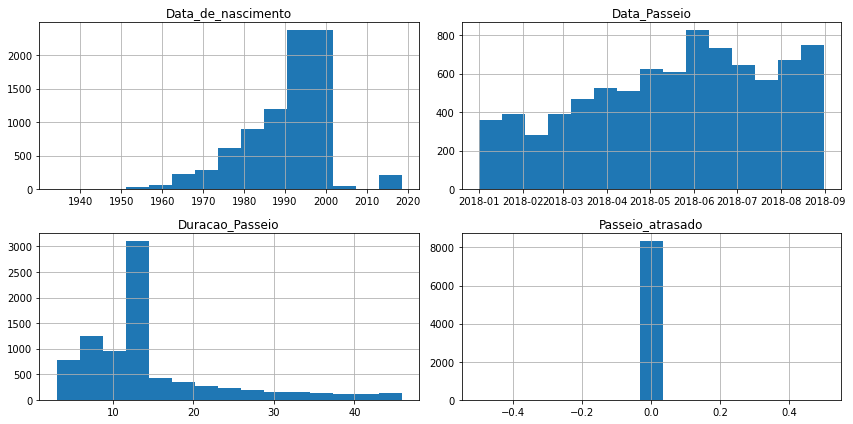

In [24]:
df1_clean = df1.copy()
df1_clean.drop(df1_clean.loc[(df1_clean["Duracao_Passeio"] < LI) | (df1_clean["Duracao_Passeio"] > LS)].index,axis=0,inplace=True)

df1_clean.hist(bins=15,figsize=(12,6))

plt.tight_layout()

### **Adição de variáveis**

Para podermos extrair mais informações do Dataset, podemos adicionar mais duas váriaveis que poderão nos dar bons insights.

A partir da coluna `Data_de_nascimento` poderemos extrair a idade dos usuários.

A partir da coluna `Data_Passeio` poderemos extrair o dia da semana em que os usuários utilizaram as bikes.


##Dia da semana

Utilizando o método `Weekday()` da biblioteca `Datetime`, podemos passar as datas dos passeios realizados, e obter o dia da semana.
Em seguida iremos fazer uma tratativa para atrelar o nome do dia.

In [25]:
import datetime as dt

df1_clean['Dia_da_semana'] = 'N/A'
df1_clean['Dia'] = 'N/A'
Dia_da_semana = []

for i in df1_clean['Data_Passeio']:
  Dia_da_semana.append(i.weekday())

df1_clean['Dia_da_semana'] = Dia_da_semana

df1_clean.loc[df1_clean['Dia_da_semana'] == 0, 'Dia'] = "Segunda"
df1_clean.loc[df1_clean['Dia_da_semana'] == 1, 'Dia'] = "Terca"
df1_clean.loc[df1_clean['Dia_da_semana'] == 2, 'Dia'] = "Quarta"
df1_clean.loc[df1_clean['Dia_da_semana'] == 3, 'Dia'] = "Quinta"
df1_clean.loc[df1_clean['Dia_da_semana'] == 4, 'Dia'] = "Sexta"
df1_clean.loc[df1_clean['Dia_da_semana'] == 5, 'Dia'] = "Sabado"
df1_clean.loc[df1_clean['Dia_da_semana'] == 6, 'Dia'] = "Domingo"

##Idade Do Usuário

Podemos calcular a idade de cada usuário subtraindo a coluna `Data_de_Nascimento` com a data em que o Dataset foi criado (2018).
E iremos definir uma idade mínima de usuários, de pelo menos `6 anos`.

In [26]:
from datetime import date
df1_clean['Idade'] = 0
df1_clean.loc[:,'Idade'] = (2018 - df1_clean["Data_de_nascimento"].dt.year)
df1_clean.drop(df1_clean.loc[df1_clean['Idade']<=5].index,axis=0,inplace=True)

Vamos observar como ficou nosso Dataset, antes de começar as análises.

In [27]:
df1_clean.head()

,Genero,Data_de_nascimento,Cidade_Estado,Data_Passeio,Hora_Inicio,Hora_Fim,Estacao_Inicio,Estacao_Fim,Duracao_Passeio,Passeio_atrasado,Dia_da_semana,Dia,Idade
58387,F,1966-04-22,Valparaíso de Goiás,2018-03-17,16:18:23,15:46:48,42 - PAT,42 - PAT,14.233333,0.0,5,Sabado,52
265289,F,1985-12-02,DF,2018-08-17,18:40:37,19:03:19,6 - Rodoviária,22 - 102 Sul,22.700000,0.0,4,Sexta,33
135948,M,1991-06-21,Novo Hamburgo,2018-05-21,18:49:00,18:55:01,16 - SRTVS,24 - Galeria,6.016667,0.0,0,Segunda,27
85776,M,1991-11-04,DF,2018-04-11,19:26:19,19:41:54,11 - Rodoviária 2,35 - CLN 403,15.583333,0.0,2,Quarta,27
189737,M,1984-08-30,RN,2018-06-25,20:30:23,NaN,36 - CLN 204,6 - Rodoviária,14.233333,0.0,0,Segunda,34


####**Análise de Dados**

##**Q1. Quais são as 3 localidades onde se concentram o maior número de passeios?**


##**Q2. Qual é o tempo médio de duração dos passeios da amostra, e quais são as 3 localidades que possuem as maiores médias de duração?**

Para responder as perguntas de negócio, iremos utlizar dois gráficos.


TEMPO MÉDIO DE DURAÇÃO: 14.911439757307424



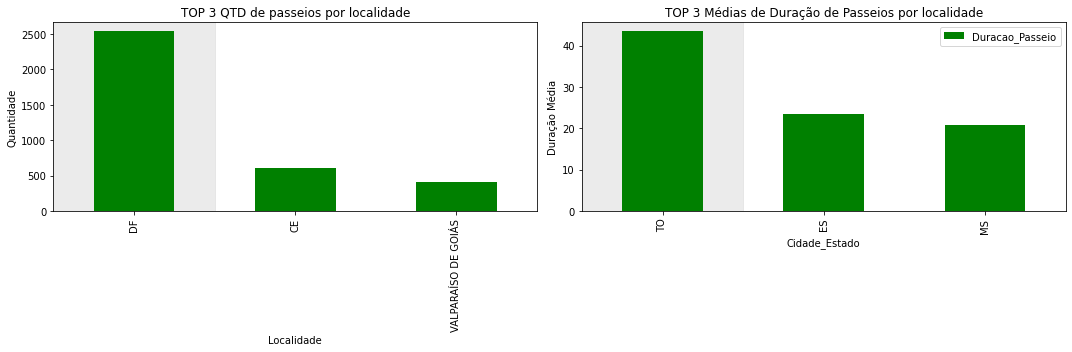

In [37]:
data = df1_clean.Cidade_Estado.value_counts().head(3)
data1 = df1_clean[['Cidade_Estado','Duracao_Passeio']].groupby('Cidade_Estado').mean().sort_values('Duracao_Passeio',ascending=False).head(3)

fig, (ax,ax1) = plt.subplots(nrows=1,ncols=2)

ax.set_title("TOP 3 QTD de passeios por localidade")
ax.set_xlabel("Localidade")
ax.set_ylabel("Quantidade")

ax1.set_title("TOP 3 Médias de Duração de Passeios por localidade")
ax1.set_xlabel("Localidade")
ax1.set_ylabel("Duração Média")

ax.axvspan(xmin=-1, xmax=0.5, ymin=0, ymax=2, color='#d9d9d9', alpha=0.5)
ax1.axvspan(xmin=-1, xmax=0.5, ymin=0, ymax=2, color='#d9d9d9', alpha=0.5)

data.plot(kind='bar',figsize=(15,5),ax=ax, color = 'green')

data1.plot(kind='bar',figsize=(15,5),ax=ax1, color = 'green')
print("\nTEMPO MÉDIO DE DURAÇÃO: {}\n".format(df1_clean['Duracao_Passeio'].mean()))

plt.tight_layout()

**Q1** **R:** Analisando o primeiro gráfico acima, as localidades com mais usuários são respectivamente: **DF**(2537), **CE**(601), **Valparaíso - GO**(408).

**Q2** **R:** O tempo médio de passeios nessa amostra é de aproximadamente **15 minutos**. Analisando o segundo gráfico, as localidades com maiores médias de duração de passeios são respectivamente: **TO**(43min), **ES**(23min), **MS**(20min).


##**Q3. Qual a média de idade dos usuários da amostra, e qual a localidade possui a maior média de idade?**

**Q3** **R:** A média de idade da amostra é aproximadamente **29 anos**. A localidade com maior média de idade de usuários é **`Planaltina de Goiais`** com média de 59 anos.


MÉDIA DE IDADE: 28.988316320255812



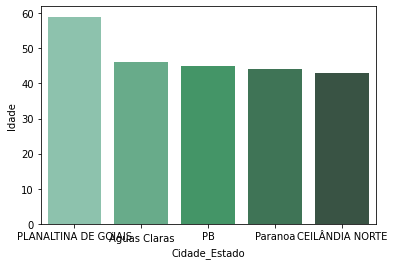

<Figure size 432x288 with 0 Axes>

In [38]:
data = df1_clean.loc[:,['Cidade_Estado','Idade']].groupby('Cidade_Estado').mean().sort_values('Idade',ascending = False).head(5).reset_index()
print("\nMÉDIA DE IDADE: {}\n".format(df1_clean['Idade'].mean()))
sns.barplot(x='Cidade_Estado',y='Idade', palette ='BuGn_d', data = data)
plt.show()
plt.tight_layout()

##**Q4. Quais são os grupos de faixa etária dos usuários da amostra, e qual é comportamento desses grupos sobre os indicadores?**

Para responder essa pergunta de negócio, iremos definir os grupos de faixa etária de acordo com a legislação brasileira, iremos utilizar a coluna de idade, e criaremos a coluna `Faixa_Etaria` com os seguintes critérios:

* Para usuários com idade menor ou igual à 12 anos, definimos **Criança**.
* Para usuários com idade entre 13 e 18 anos, definimos **Adolescente**.
* Para usuários com idade entre 19 e 29 anos, definimos **Jovem**.
* Para usuários com idade entre 30 e 59 anos, definimos **Adulto**.
* Para usuários com idade maior que 59 anos, definimos **Idoso**.

In [30]:
df1_clean.loc[df1_clean['Idade']<=12,'Faixa_Etaria'] = 'Crianca'
df1_clean.loc[(df1_clean['Idade']>12)&(df1_clean['Idade']<=18),'Faixa_Etaria'] = 'Adolescente'
df1_clean.loc[(df1_clean['Idade']>18)&(df1_clean['Idade']<=29),'Faixa_Etaria'] = 'Jovem'
df1_clean.loc[(df1_clean['Idade']>29)&(df1_clean['Idade']<=59),'Faixa_Etaria'] = 'Adulto'
df1_clean.loc[df1_clean['Idade']>59,'Faixa_Etaria'] = 'Idoso'

Após a criação da nova coluna, iremos plotar dois gráficos que nos ajudarão nas análises.

In [39]:
data = df1_clean.Faixa_Etaria.value_counts().reset_index()
data = pd.DataFrame(data)
data.columns = ['Faixa','Volume']

fig = px.pie(data, values="Volume", names="Faixa",
             color_discrete_sequence=px.colors.sequential.RdBu,
             opacity=0.7, hole=0.5,width=800, height=400)

fig.update_layout(
    title={
        'text': "Representação(%) dos Passeios por Grupos ",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [40]:
data = df1_clean[['Faixa_Etaria','Duracao_Passeio']].groupby(['Faixa_Etaria']).mean().sort_values('Duracao_Passeio',ascending=False).reset_index()

fig = px.pie(data, values="Duracao_Passeio", names="Faixa_Etaria",
             color_discrete_sequence=px.colors.sequential.RdBu,
             opacity=0.7, hole=0.5,width=800, height=400)

fig.update_layout(
    title={
        'text': "Representação(%) de Duração de Passeios por Grupos",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})


fig.show()
print(data)

  Faixa_Etaria  Duracao_Passeio
0      Crianca        21.359804
1        Idoso        16.552419
2       Adulto        15.124577
3  Adolescente        14.765519
4        Jovem        14.747034


**Q4** **R:** A partir dos gráficos é possivel concluir que o grupo mais presente na amostra é o **Jovem**, ocupando aproximadamente **69%** em volumes de passeios. No entanto o grupo que utilizam as bikes por mais tempo nas rotas é público **Criança** tendo em média **21 minutos** de passeio.

###**Q5. Em quais dias os usuários mais utilizam as bikes, e quais são os horários de maior movimento?**

Para repondermos essa pergunta de negócio, iremos criar uma nova coluna chamada `Hora`, que será a parte de hora(HH) extraída a partir da coluna `Hora_Inicio`.
E assim, plotar dois gráficos abaixo que nos ajudarão nas análises.


In [33]:
df1_clean['Hora_Inicio'] = pd.to_datetime(df1_clean['Hora_Inicio'],format = "%H:%M:%S").dt.time

import time
Hora = []
for i in df1_clean['Hora_Inicio']:
  Hora.append(i.strftime('%H'))

df1_clean['Hora'] = Hora

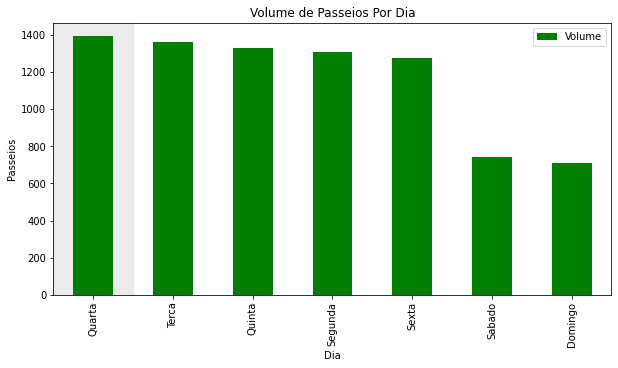

<Figure size 432x288 with 0 Axes>

In [34]:
data = df1_clean.Dia.value_counts().reset_index()
data = pd.DataFrame(data)
data.columns = ['Dia','Volume']
data.set_index('Dia',inplace = True)

data1 = df1_clean.Hora.value_counts().reset_index()
data1 = pd.DataFrame(data1)
data1.columns = ['Hora','Volume']
#data1.set_index('Hora',inplace = True) 

fig, ax = plt.subplots()
ax.set_title("Volume de Passeios Por Dia")
ax.set_ylabel("Passeios")
ax.axvspan(xmin=-1, xmax=0.5, ymin=0, ymax=2, color='#d9d9d9', alpha=0.5)
data.plot(kind="bar",ax=ax,color= 'Green',figsize=(10,5))

fig = go.Figure()

fig.add_trace(go.Scatter(x=data1['Hora'], y=data1['Volume'], fill='tonexty',fillcolor='green',mode= 'none'))
#fig = px.area(data1,x='Hora', y='Volume',width = 700, height = 500, title = "Volume de Passeios por Hora")
fig.update_layout(
    title={
        'text': "Volume de Passeios por Hora",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
plt.show()
fig.show()
plt.tight_layout()


**Q5** **R:** Conforme o primeiro gráfico, observamos que o dia que há mais passeios durante a semana é a **`Quarta-Feira`**. E a hora de maior pico durante o dia são às **`18hs`**.
*(Obs: É possível observar no segundo gráfico que há outros picos durante dia, nos horários: **`13hs`**,**`20hs`** e **`22hs`** )*

###**Conclusões**

Foram feitas apenas análises superficiais dentro de uma amostra da base do projeto +Bike. Porém já foram notados alguns *outliers*, tratamentos de inforamções ausentes, ajustes que o Dataset necessitava, e algumas análises interessantes:

* Notamos que a Cidade/Estado com maior volume de passeios é o **DF** *(2537)*, porém a Cidade/Estado com maior tempo médio de passeio é **TO** *(43min)*.

* A média de idade dos usuários da amostra é de aproximadamente **29 anos**, informação que também é refletida quando abservamos as aberturas por grupos, e olhamos **60%** dos usuários caracterizados como jovens.

* Mesmo tendo um alto volume de passeios entre **Jovens** *(59.6%)* e **Adultos** *(36.1%)*, o grupo que tem maior representação na média de duração dos passeios é o de **Crianças** *(25.9%)*. 
O que podemos definir com essa análise é que os jovens provavelmente utilizam as bikes para fins mais objetivos, como uma volta do trabalho por exemplo, que é uma atividade que possa ter uma duração menor, porém constante. Já as crianças provavelmente utilizam para recreação, com uma duração maior e menos constância.

* Outro ponto que analisamos são os períodos, a **Quarta-Feira** é o dia de maior volume de passeio, seguido da Terça. Já o horário de maior pico é as **18hs**, essa análise nos ajuda a sustentar o nosso insight anterior, em relação a utilização das bikes para o transporte mais objetivo e com destinos definidos, visto que os dias de semana são os mais volumosos, e o horário é um período de pico padrão, em que as pessoas se deslocam do trbalho para casa, ou vice e versa. 

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial para extrairmos análises e bons insights .
